In [1]:
from pathlib import Path

import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sbn

import albumentations as albu
from albumentations.pytorch import ToTensorV2

%matplotlib inline

In [2]:
data_dir = Path("..") / "input"
train_dir = data_dir / "train"
data_dir

PosixPath('../input')

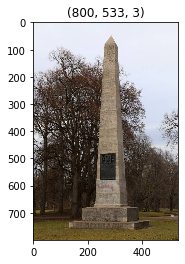

In [3]:
img = cv2.imread(str(train_dir / "1"/ "7" / "6" / "17660ef415d37059.jpg"))[:,:,::-1]

plt.imshow(img)
plt.title(str(img.shape));

In [66]:
augs = albu.Compose([
    albu.RandomResizedCrop(224, 224, scale=(0.6, 1.0)),
    albu.HorizontalFlip(p=0.5),
    albu.OneOf([
        albu.IAAAdditiveGaussianNoise(),
        albu.GaussNoise(),
    ], p=0.2),
    albu.OneOf([
        albu.MotionBlur(p=.2),
        albu.MedianBlur(blur_limit=3, p=0.1),
        albu.Blur(blur_limit=3, p=0.1),
    ], p=1),
#     albu.RandomBrightnessContrast(p=0.5),
#     albu.RandomGamma(p=0.5),
#     albu.Blur(blur_limit=3, p=0.5),
#     albu.Normalize(),
#     ToTensorV2()
])

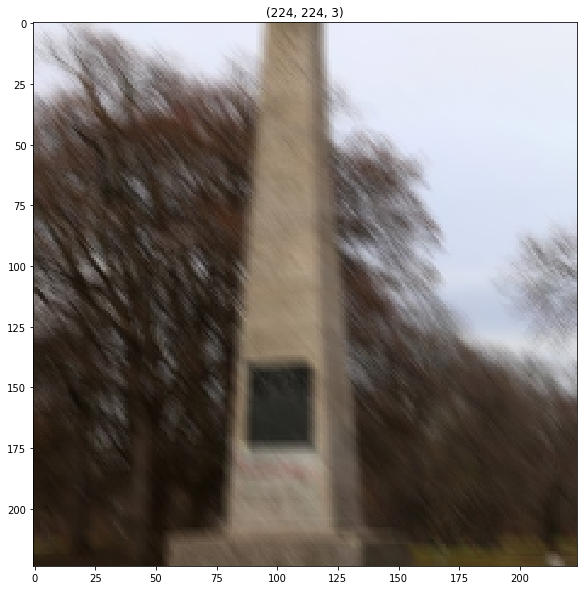

In [69]:
out = augs(image=img)["image"]

plt.figure(figsize=(10, 10))
plt.imshow(out)
plt.title(str(out.shape));